### Supervised Learning with sklearn

Machine Learning - The art and science of giving computers the ability to learn and make decisioins from data without being explicitly programmed

EX: 
- predict wether an email is spam or not
- clustrering wikipedia entries into categories

supervised learning uses labels, unsupervised learning does not use label

Unsupervised learning 
- uncovering hidden patterns from unlabeled data 
    - ie clustering customers into categories (clustering)
- reinforcment learning, software agents interact with an environment and learn to optimize behavir via reward and punishment
    
Supervised learning
- predictor variables(also called features or independent variables) and a target variable (also called response variable or dependent variable)
- aim, build a model to predict the target variable given the predictor variables
- classification - target variable consists of categories
- regression - target variable is continuous

using scikit-learn/sklearn this course
- integrates well with SciPy stack
- other packages: TensorFlow, keras

#### Exploratory data analysis (EDA)


In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')        #set plotting style


In [11]:
iris = datasets.load_iris()
type(iris)

#datasdet is a bunch, similar to dictionary with key value pairs

sklearn.utils.Bunch

In [12]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [15]:
#numpy arrays with 150 rows and 4 features
print(type(iris.data))
print(iris.data.shape)

print(type(iris.target))
print(iris.data.shape)

<class 'numpy.ndarray'>
(150, 4)
<class 'numpy.ndarray'>
(150, 4)


In [16]:
#0 indexing to refer to the target names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
#set feature and target to X and y, pass in column names
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


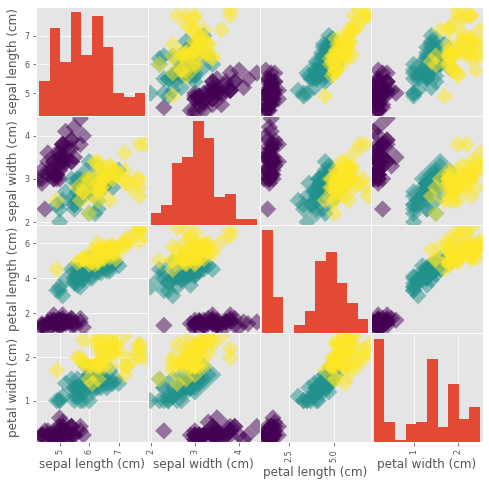

In [20]:
### visual EDA
#c(color) = target variable, graph will color by species now
#s = marker size
_ = pd.plotting.scatter_matrix(df, c=y, figsize=[8,8], s=150, marker='D')

#### Visual EDA Example
features in this dataset are all binary so a count plot is more useful
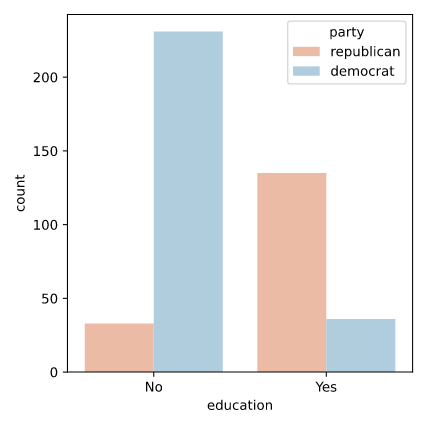

In [ ]:
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

#### The Classification Challenge

K-nearest Neighbors (KNN) - predocts the label of any data point by looking at the #k nearest data points. Creates a set of decision boundaries

all machine learning models are in Python as classes
- implement algorithms for learning and predicting
- training a model is 'fitting'

KNN requires
- features must be entered as np array or pd df in seperate columns
- target must be single column with same length as features
- features must be continuous, not categorical
- must remove all NaNs

        from sklearn.neighbors import KNeighborsClassifier
        knn=KNNeighborsClassifier(N_neighbors=6)
        knn.fit(iris['data'], iris['target']
        prediction = knn.predict(X_new_)
        X_new.shape will return a prediction for each row

In [ ]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)

In [ ]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

#### Measuring Model Performance
accuracy = # correct predictions / # total data points
 - how well will the model perform on new data?

- split data into training set for modeling and testing set for predicting
        import sklearn.model_Selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=21, stratify=7)
 - default is 75%/25%, can adjust with (test_size = )
 - perform split so that it labels are reflected in train and test as they are in original data with (stratify = y)
 
         knn.score(X_test,y_test)
         
- larger k = smoother decision boundary = less complex model
- smaller k = more complex model = can lead to overfitting
- goal is to balance performance and simplicity

In [ ]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [ ]:
#Train/Test Split + Fit/Predict/Accuracy
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = np.array(digits.data)
y = np.array(digits.target)

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

OUTPUT: 0.9833333333333333

In [ ]:
#Overfitting and underfitting
#construct such a curve for the digits dataset

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

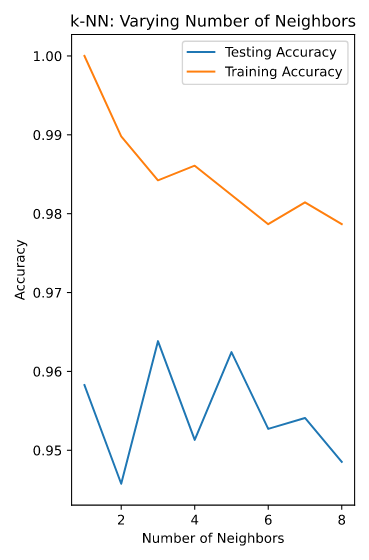

## Chapter 2 Intro to Regression

Regression - target is a continuous 

    from sklearn.linear_model import LinearRegression
    reg = LinearRegression()
    reg.fit(X_rooms, y)
    prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

In [ ]:
## Importing data for supervised learning

# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder.csv')

# Create arrays for features and target variable
y = df['life']
X = df['fertility']

# Print the dimensions of y and X before reshaping
print("Dimensions of y before reshaping: ", y.shape)
print("Dimensions of X before reshaping: ", X.shape)

# Reshape X and y
y_reshaped = y.reshape(-1,1)
X_reshaped = X.reshape(-1,1)

# Print the dimensions of y_reshaped and X_reshaped
print("Dimensions of y after reshaping: ", y_reshaped.shape)
print("Dimensions of X after reshaping: ", X_reshaped.shape)

OUTPUT:
Dimensions of y before reshaping:  (139,)
Dimensions of X before reshaping:  (139,)
Dimensions of y after reshaping:  (139, 1)
Dimensions of X after reshaping:  (139, 1)

### The basics of linear regression

- fit a line to the data
- 2D line equation 
        y = ax + b
        y = target
        x = single feature
        a,b = parameters of model
- how do we choose a and b?
    - define an error function for any given line and choose the line that minimizes error function (also called loss function)
    
Loss function 
- residual- vertical distance between each point and the regression line, minimize this
- OLS (ordinary least squares) - minimize the sum of squares of residuals
    - .fit() performs OLS and calculates a (coefficient) and b variables
    - multiple variables y = a1x1 + a2x2 + a3x3 + ... anxn +b
    
  
- Regressionin Python
    from sklearn.model_selection import train_Test_split
    from sklearn.linear_model import LinearRegression
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
    reg_all = LinearRegression()
    reg_all.fit(X_train, y_train)
    y_pred = reg_all.predict(X_test)
    
R-squared - default scoring method for LR 
    quantifies amount of variance in target variable that is predicted from feature variables
    reg_all.score(X_test, y_test)
    
- linear regression is most often compled with regularization for regularized linear models

In [ ]:
## FIT AND PREDICTION FOR REGRESSION

# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

OUTPUT:
0.6192442167740035

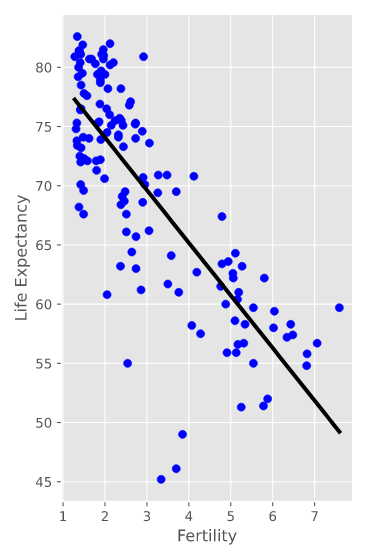

In [ ]:
## TRAIN TEST SPLIT FOR REGRESSION

# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

OUTPUT:
R^2: 0.838046873142936
Root Mean Squared Error: 3.2476010800377213

### Cross-Validation

cross-validation motivation
- model performance is dependent on way data is split
- not representative of model's ability to generalize

cross-validation basics
- split dataset into 5 groups/folds
- hold first fold as test set, fit on remaining 4 folds, compute metric of interest
- then hold 2nd fold for test set and remaining for fit and computation
- then hold thirs for test set, etc.
- from this we get 5 values of R^2 for 5-fold CV
- k folds = k-fold CV

        from sklearn.model_selection import cross_val_score
        reg=LinearRegression()
        cv_results = cross_val_score(reg, X, y, cv=5)
        #report returns array of 5 values, can take np.mean(cv_results)

In [ ]:
## 5-fold cross-validation

# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

OUTPUT:
[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793232

In [ ]:
## K-Fold CV comparison

# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

OUTPUT:
0.8718712782622108
0.8436128620131201

### Regularized Regression

- fitting a linear regression minimizes a loss function to find coefficient for each feature variable
- can get overfitting if coefficient is too large
- alter loss function to penalize for large coefficients

Ridge regression
- loss function = OLS loss function + squared value of each coefficient times constant alpha 
- penalized for large magnitude coefficient
- select alpha (liek selecting k in KNN) *hyper parameter tuning*
- alpha control model complexity
    - alpha = 0 is the same as regular OLS (overfitting)
    - very high alpha can lead to underfitting
    
            import sklearn.linear_model import Ridge
            train-test-split
            ridge = Ridge(alpha=0.1, normalize = True)
            #True, all variables on same scale
            y_pred = ridge.predict(X_test)
            ridge.score(X_test, y_Test)

Lasso regression
- lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as  regularization because the regularization term is the  norm of the coefficients. This is not the only way to regularize, however.
- loss function = OLS + absolute value of each coefficient times alpha
- similar to Redge regression
- can be used to select important features beacue it shrink the coefficients of less important features to 0, all others are selected by lasso reg
            from sklearn.linear_model import Lasso
            names = boston.drop('MEDV', axis=1).columns
            lasso = Lasso(alpha=0.1)
            lasso_coef = lasso.fit(X,y).coef_

        _ = plt.plot(rang(len(names)), lasso_coef)
        _ = plt.xticks(range(len(names)), names, rotation=60)
        _ = plt.ylabel('Coefficients')
        plt.show()

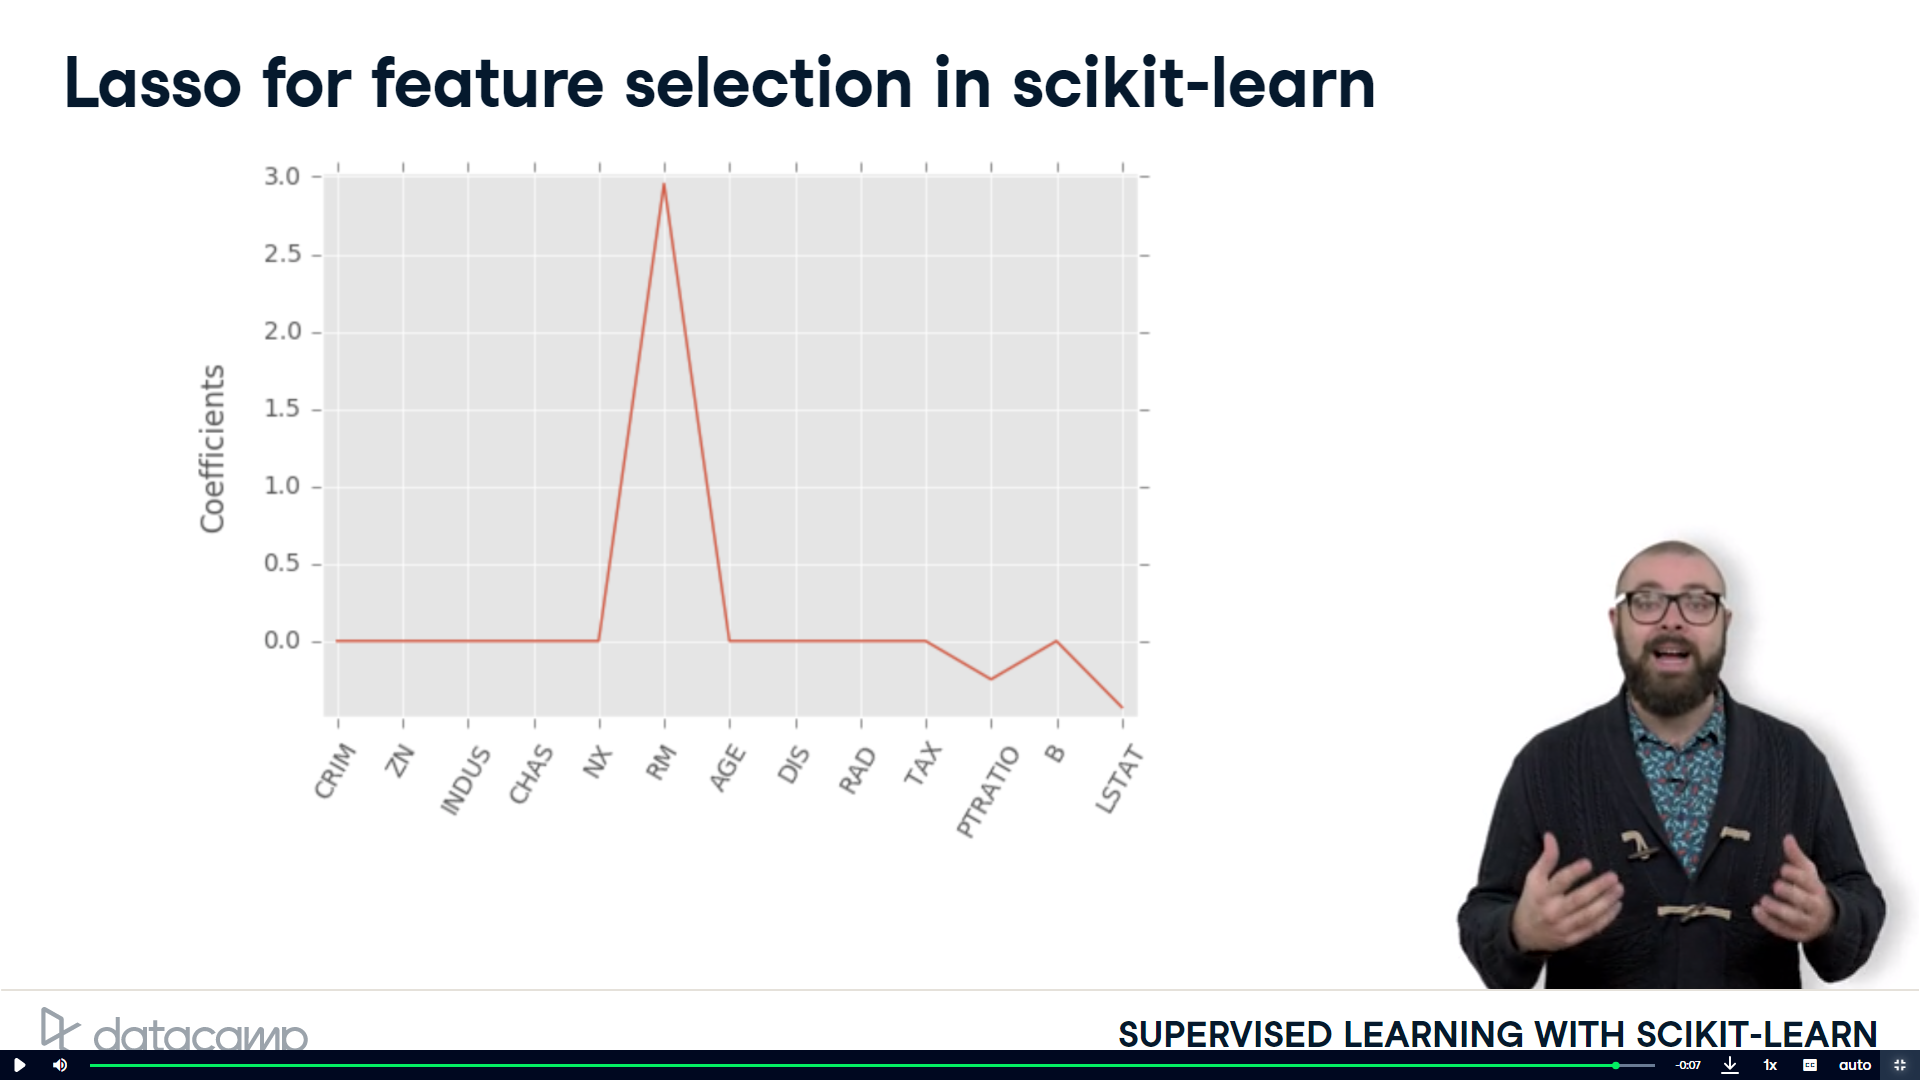

In [ ]:
## REGULARIZATION WITH LASSO

# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [ ]:
## REGULARIZATION WITH RIDGE
## Lasso is great for feature selection, but when building regression models, 
## Ridge regression should be your first choice.

# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
    
# Display the plot
display_plot(ridge_scores, ridge_scores_std)


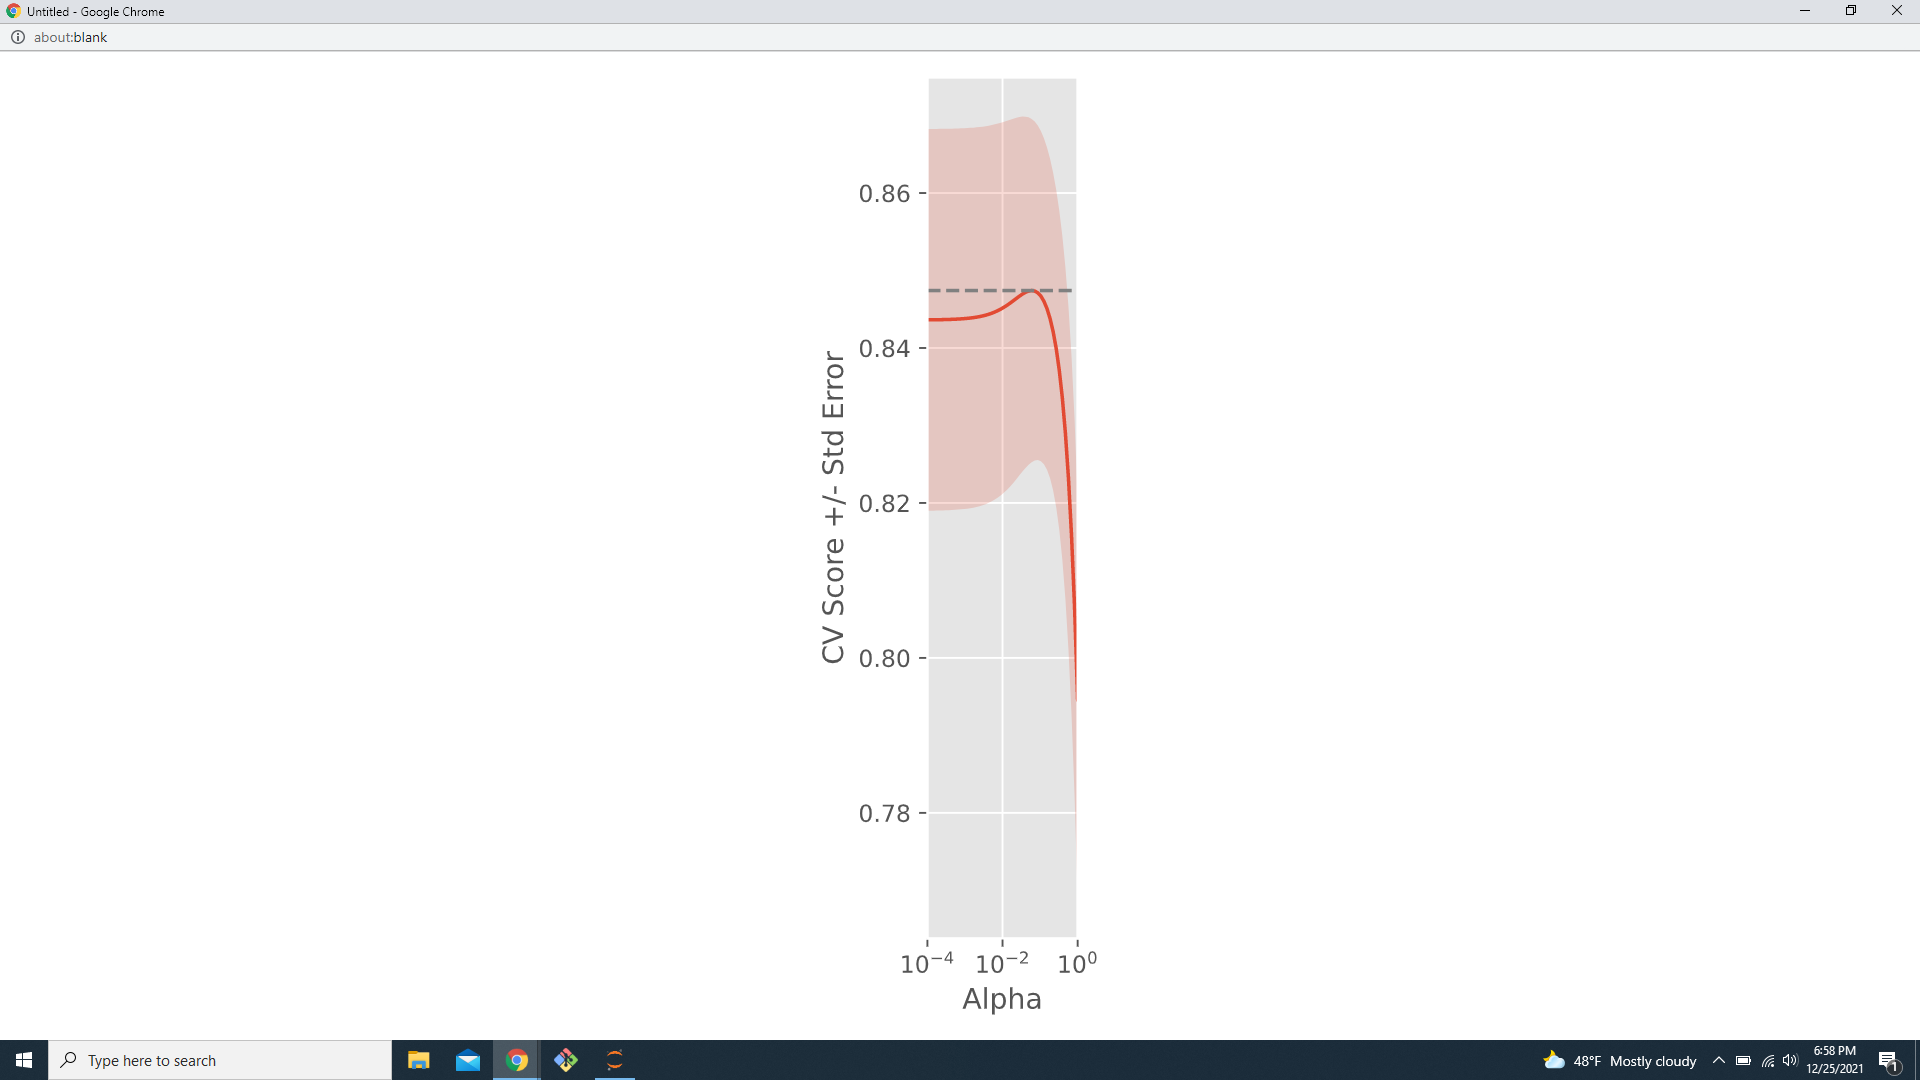

## Chapter 3 - Evaluating a Model

Classification performance metrics
- accuracy
- fraction of correctly classified samples
- not always the best metric
- class imbalance can throw off accuracy, need more nuanced metric
- confusion matrix can diagnose classification predictions

                    predicted        actual
        actual +        true pos         false neg
        actual -        fals pos         true neg
        
- other metric from confusion matrix
        accuracy = TP + TN / TOTAL
        precision = TP / ALL POSITIVE PREDICTIONS (PPV - pos predictive value)
        recall = TP / TP + FN (sensitiviey, hit rate, true positive rate)
        F1 Score = 2 * (precision * recall / precision + recall)
- EX: high precision = low false positive rate (not many real emails predicted as spam)

        from sklearn.metrics import classification _report
        from sklearn.metrics import confusion_matrix
        knn
        train test split
        fit
        predict
        print(confusion_matrix(Y_test, y_pred)
        print(classification_report(Y_test, y_pred)

In [ ]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

OUTPUT:
[[176  30]
 [ 52  50]]
             precision    recall  f1-score   support

          0       0.77      0.85      0.81       206
          1       0.62      0.49      0.55       102

avg / total       0.72      0.73      0.72       308

### Logistic Regression & ROC Curve

- used in CLASSIFICATION problems, not regression problems
- log reg outputs probabilities 
    - if p > 0.5 , date labeled 1
    - if p < 0.5 , data labeled 0
- 
        from sklearn.linear_model import LogisticRegression
        from sklearn.model_selection import train_test_split
        logreg=LogisticRegression()
        train test split
        logreg.fit(training data)
        y_pre = logreg.predict(X_test)

probability thresholds
- by default logreg threshold = 0.5
- not specific to logreg, kNN also has thresholds

ROC (reciever operating characteristic curve)
- when thresh p = 0, all data is predicted 1 (TP rate = FP rate = 1)
- when thresh p = 1, all data is predicted 0 (TP rate = FP rate = 0)
- the ROC curve is the variation between 
        from sklearn.metric import roc_curve
        
        #returns array with two columns containing probabilities
        y_pred_prob = logreg.predict_proba(X_test)[:,1]
        
        #unpacks three variables that can be plotted        
        fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
        
        plt.plot([0,1],[0,1],'k--')
        plt.plot(fpr,tpr,label='Logistic Regression')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Logistic Regression ROC Curve')
        plt.show();

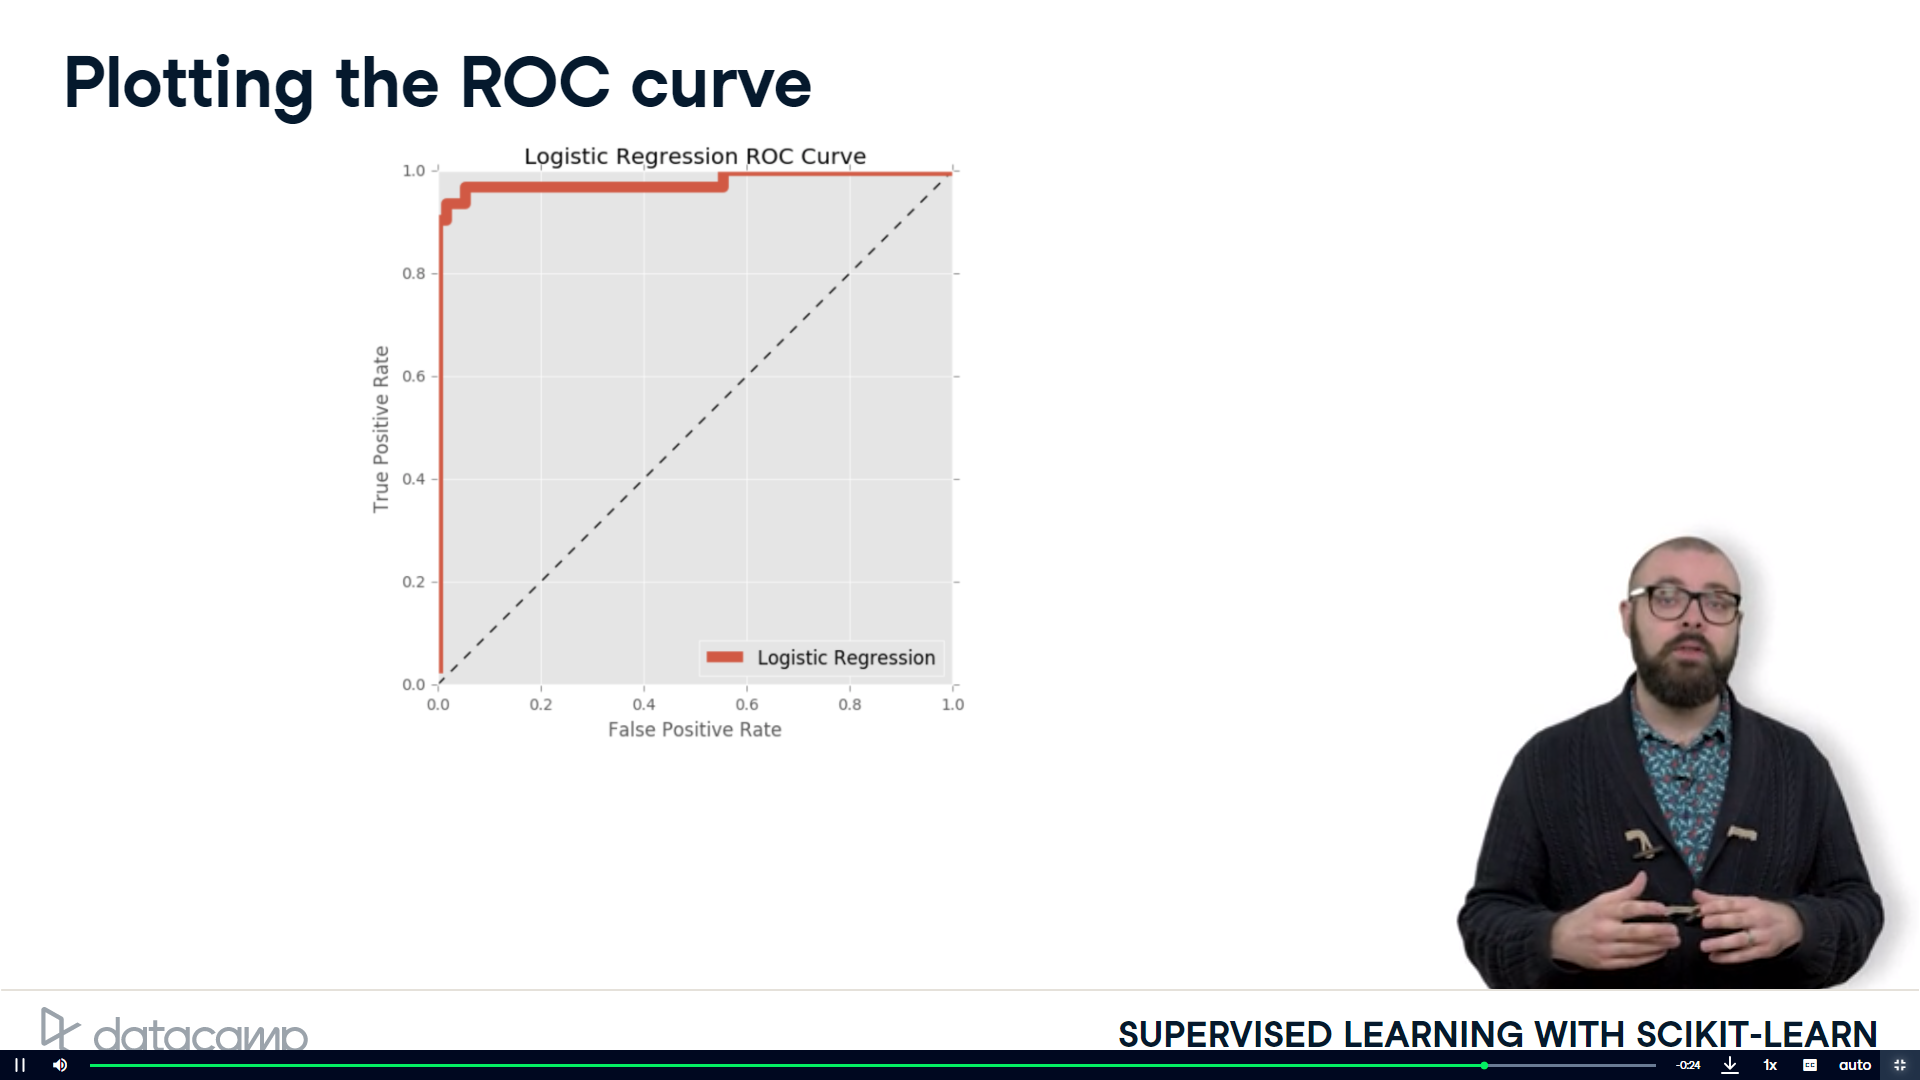

In [ ]:
## BUILDING A LOGISTIC REGRESSION MODEL

# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

OUTPUT:
[[176  30]
 [ 35  67]]
             precision    recall  f1-score   support

          0       0.83      0.85      0.84       206
          1       0.69      0.66      0.67       102

avg / total       0.79      0.79      0.79       308

In [ ]:
## PLOTTING AN ROC CURVE
## .predict_proba() method returns the probability of a given sample 
## being in a particular class
## evaluate performance of Logistic Regression above

# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
#plot fpr/false pos rate on x axis and tpr/true pos rate/recall of y axis
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

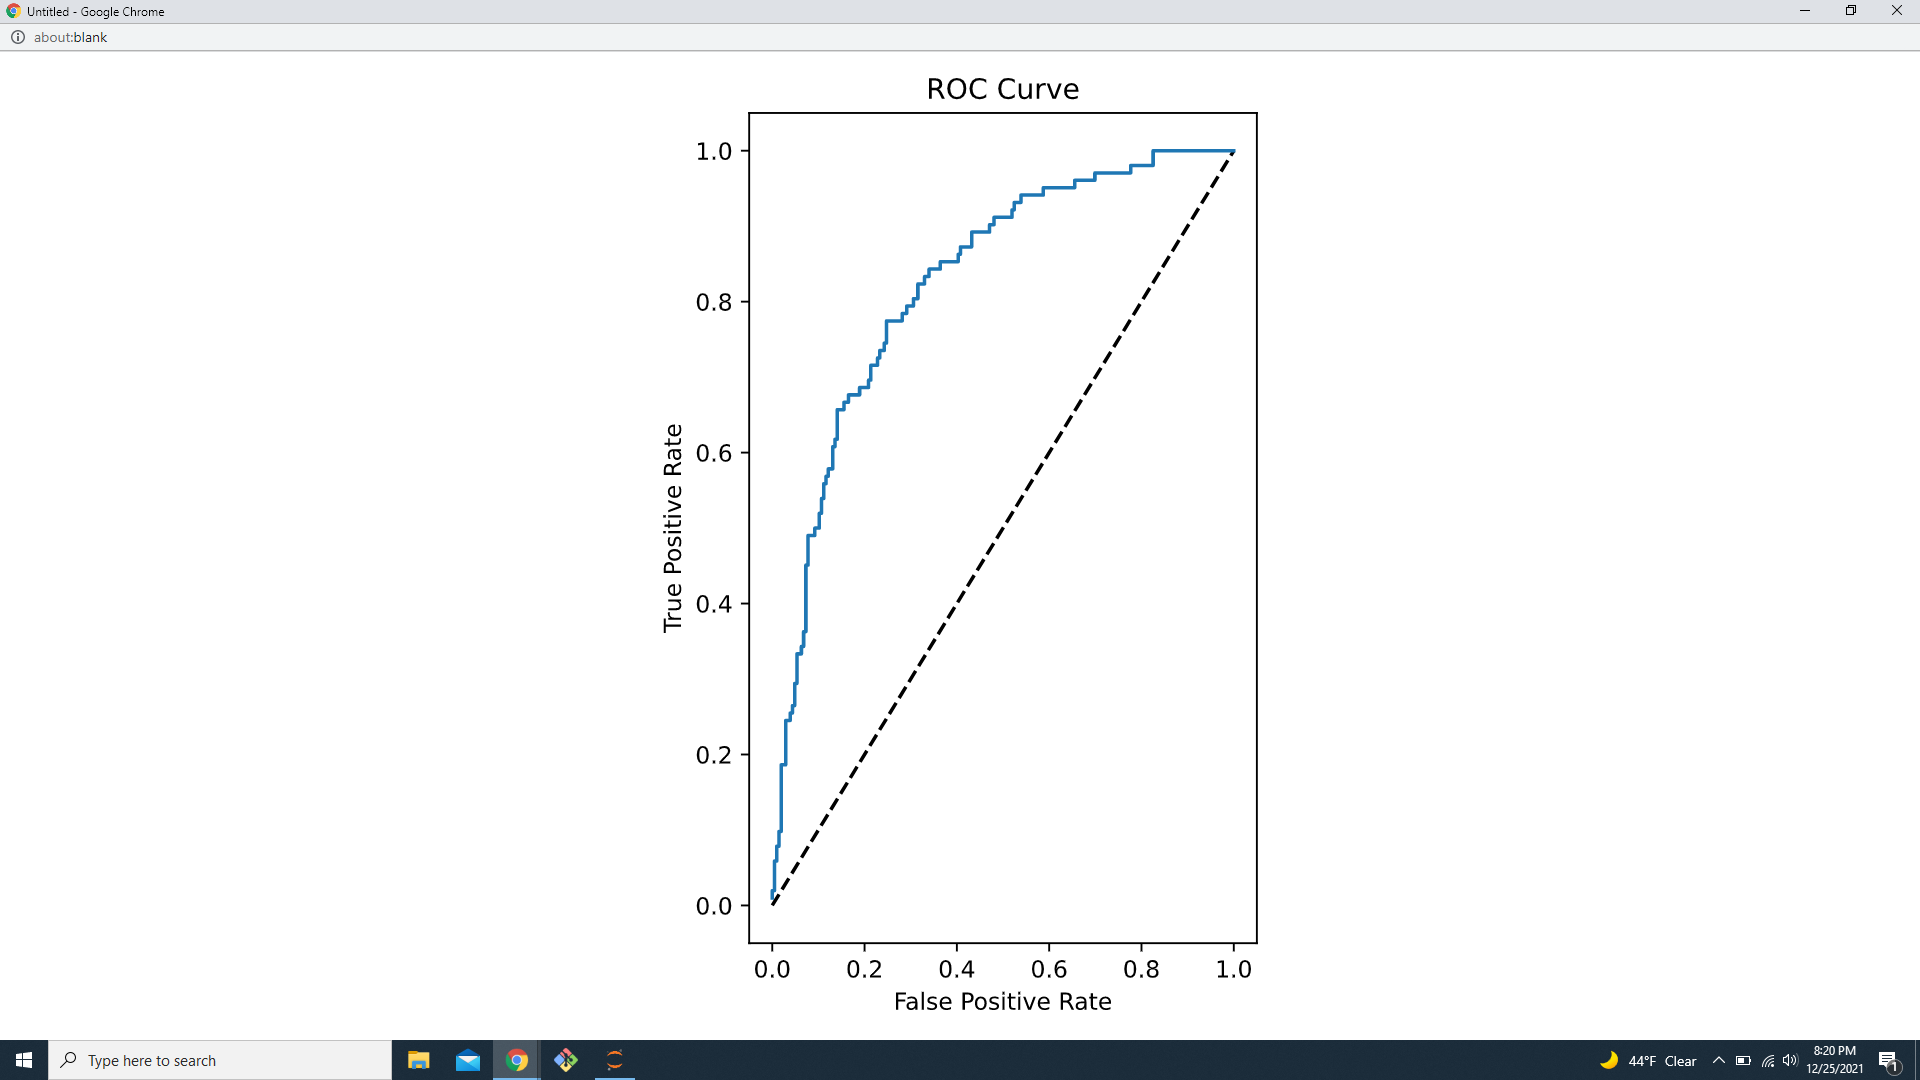

#### PRECISION-RECALL CURVE
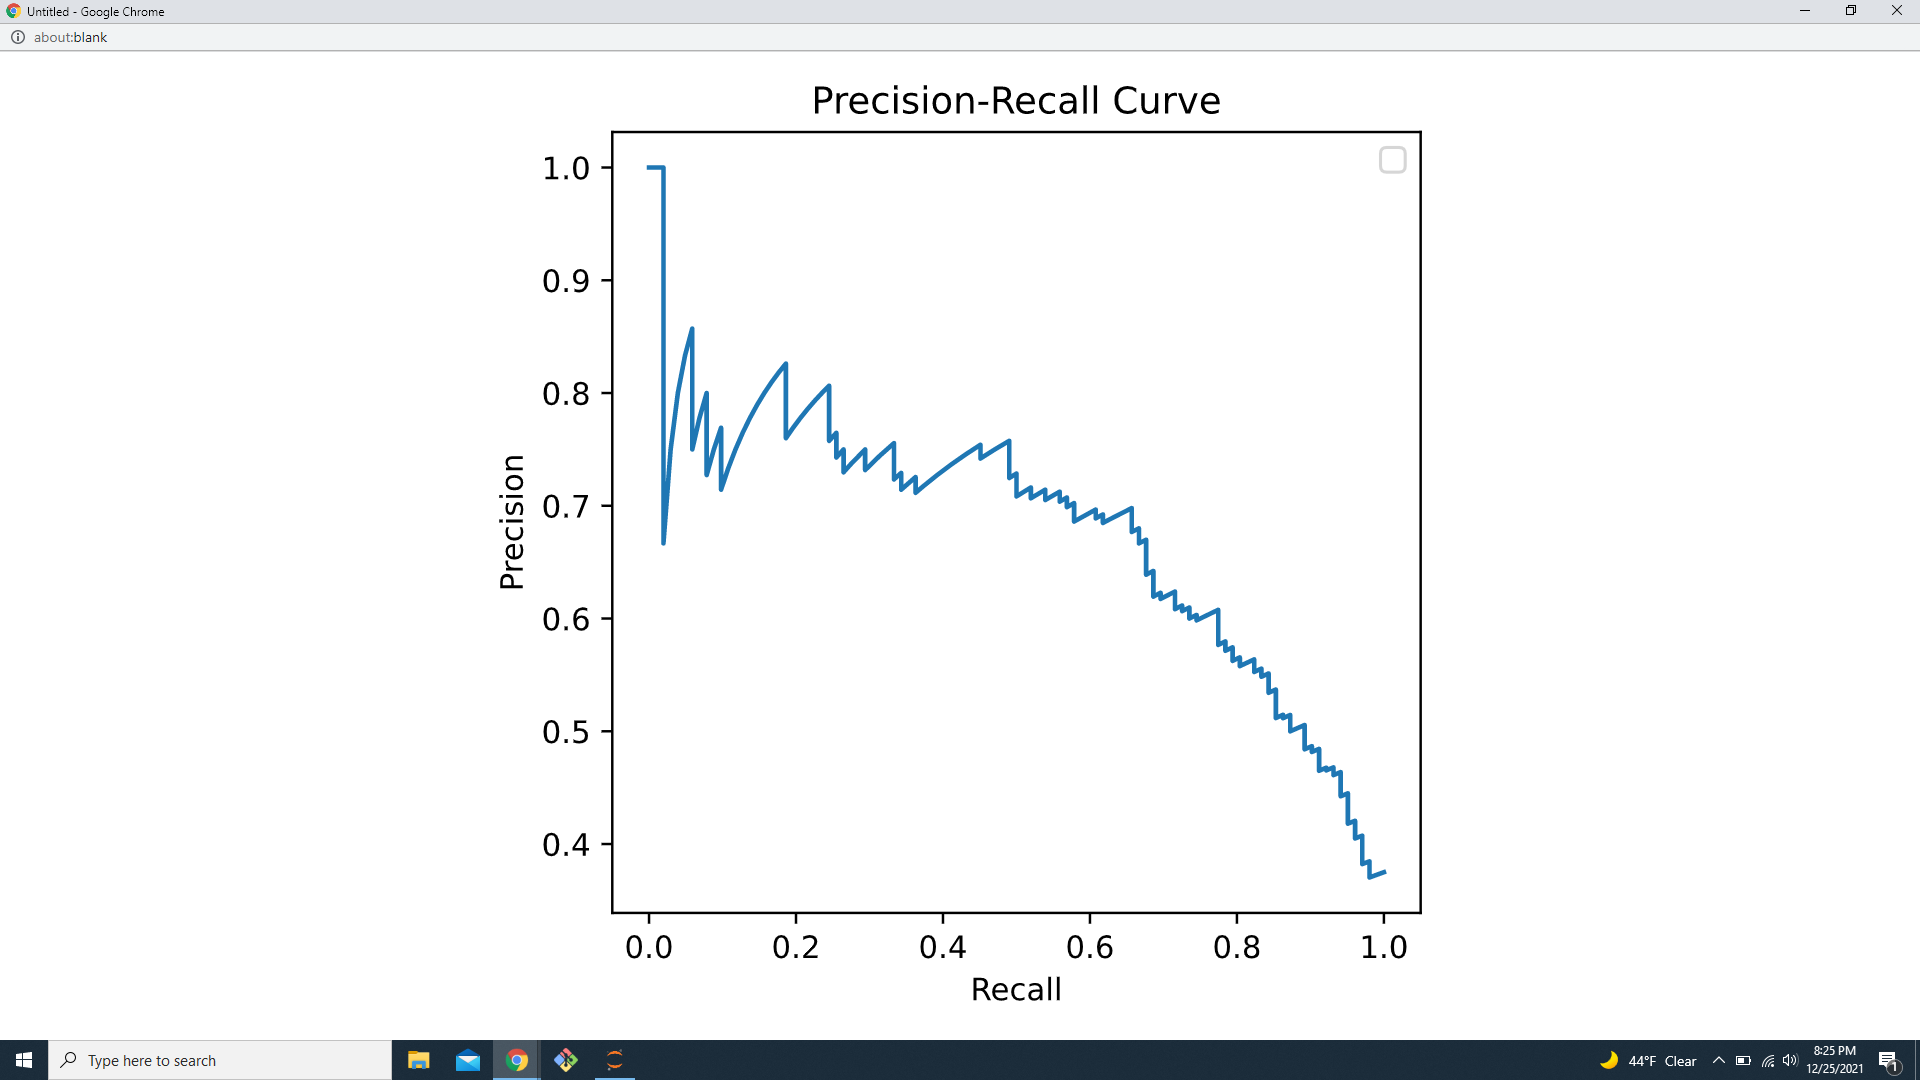
diabetes dataset

1 = diabetes
0 = not diabetes
- A recall of 1 corresponds to a classifier with a low threshold in which all females who contract diabetes were correctly classified as such, at the expense of many misclassifications of those who did not have diabetes.
- Precision is undefined for a classifier which makes no positive predictions, that is, classifies everyone as not having diabetes. In the case when there are no true positives or true negatives, precision is 0/0, which is undefined.
- When the threshold is very close to 1, precision is also 1, because the classifier is absolutely certain about its predictions.

#### Area Under the ROC Curve (AUC Score)

- larger area under ROC, the better the model is
- Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5.
- if you have a perfect model with 100% TP and 0% FP, the area would be 1.0
        from sklearn.metrics import roc_auc_score
        logreg
        train test split
        fit
        y_pred_prob = logreg.predict_proba(X_test)[:,1]
        roc_auc_score(Y_test, y_pred_prob)
- AUC using cross-validation
        from sklearn.model_selection import cross_val_score
        #additional argument
        cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
        print(cv_scores)

In [ ]:
## AUC COMPUTATION

# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

OUTPUT:
AUC: 0.8254806777079764
AUC scores computed using 5-fold cross-validation: 
    [0.80148148 0.8062963  0.81481481 0.86245283 0.8554717 ]

### Hyperparameter Tuning

hyperparameters - cannot be learned by fitting the model
- linear regression: choosing parameters
- ridge/lasso - choosing alpha
- KNN - choosing n_neighbors

choosing the correct hyperparameter 
- fit all seperately and see how they perform 
- choose the best performance
- essential to use cross-validation
- train test split first is essential


- grid search cross-validation
        from sklearn.model_Selection import GridSearchCV
        param_grid = {'n_neighbors': np.arange(1,50)}
        knn = KNeighborsClassifier()
        knn_cv = GridSearchCV(knn, param_grid, cv=5)
        knn_cv.fit(X,y)
        knn_cv.best_params_    # output the best knn value here
        knn_cv.best_score_     # R-squared value

In [ ]:
## HYPERPARAMETER TUNING WITH GRIDSEARCHCV
## Like the alpha parameter of lasso and ridge regularization,
## logistic regression also has a regularization parameter: C
## which controls the inverse of the regularization strength
## large C can lead to overfit, small C can lead to underfit
## normally want to train-test-split first

# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

OUTPUT:
Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.7708333333333334

In [ ]:
## Hyperparameter tuning with RandomizedSearchCV
## GridSearchCV can be computationally expensive. A solution to this is to use 
## RandomizedSearchCV, in which not all hyperparameter values are tried out.

## Decision Tree: Just like k-NN, linear regression, and logistic regression, 
## decision trees in scikit-learn have .fit() and .predict() methods 
## Decision trees have many parameters that can be tuned, such as 
## max_features, max_depth, and min_samples_leaf: 
## This makes it an ideal use case for RandomizedSearchCV.

# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

OUTPUT:
Tuned Decision Tree Parameters: 
    {'criterion': 'gini', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 2}
Best score is 0.7395833333333334

#### Hold-out set for final evaluation

how well will the model perform on unseen data?
- using ALL data for cross-validation is not ideal
- split data into training and hold-out set at beginning
- perform frist search cross-validation on training set
- choose best hyperparameters and test on unseen testing data

In [ ]:
## Hold-out set in practice I: Classification
## create a hold-out set, 
## tune the 'C' and 'penalty' hyperparameters of a logistic regression classifier 
## using GridSearchCV on the training set.

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

OUTPUT:
Tuned Logistic Regression Parameter: 
    {'C': 0.4393970560760795, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.7652173913043478

In [ ]:
## Hold-out set in practice II: Regression
## Lasso used the L1 penalty to regularize, while ridge used the L2 penalty. 
## In elastic net regularization, the penalty term is a linear combination of L1 and L2:
## a*L1 + b*L2 - corresponding to  'l1_ratio' parameter

# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

OUTPUT:
Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.8668305372460283
Tuned ElasticNet MSE: 10.05791413339844

## CHAPTER 4 - Preprocessing Data

categorical variables
- convert to numerical
- convert to 'dummy variables' 
- sklearn: OneHotEncoder
- pandas: pd.get_dummies
        import pandas 
        df_origin = pd.get_dummies(df)

In [ ]:
## EXPLORING CATEGORICAL FEATURES

# Import pandas
import pandas as pd

# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('gapminder.csv')

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()

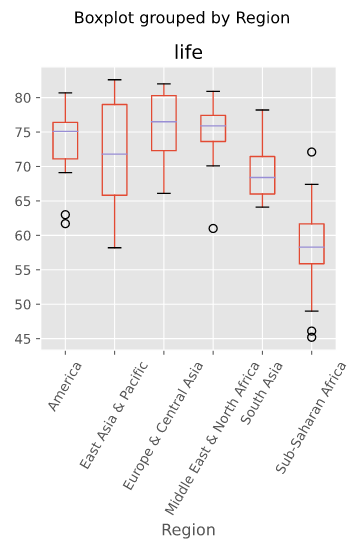

In [ ]:
## CREATING DUMMY VARIABLES

# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

## drop the unneeded dummy variables

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

In [ ]:
## REGRESSION WITH CATEGORICAL FEATURES

# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha = 0.5, normalize = True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)

OUTPUT: 
[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]

#### Handling Missing Data

- Ex: diabetes dataset, empty values were registered as 0, replace with NaN
        df.insulin.replace(0, np.nan, inplace = True)
- Can replace missing values with mean of all non missing values
- Imputer transformer
        from sklearn.preprocessing import Imputer
        imp = Imputer(missing_values = 'NaN', strategy = 'mean, axis=0)
        imp.fit(X)
        X = imp.transform(X)
- Imputing with Pipeline
        from sklearn.pipeline import Pipeline
        from sklearn.preprocessing import Imputer
        
        imp = Imputer(missing_values = 'NaN', strategy = 'mean, axis=0)
        logreg = LogisticRegression()
        
        steps = [('imputation', imp), ('logistic_regression', logreg)]
        pipeline=Pipeline(steps)
        
        train-test-split
        
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        pipeline.score(X_test, y_test)

In [ ]:
## DROPPING MISSING DATA

# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

OUTPUT:
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)

In [1]:
## IMPORTING MISSING DATA IN ML PIPELINE 1
## practice setting up a pipeline with two steps: 
## the imputation step, followed by the instantiation of a classifier. 
## 3 classifiers so far: k-NN, logistic regression, and the decision tree. 
## 4th one: Support Vector Machine/SVM, using a Support Vector Classifier here

# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

In [ ]:
## IMPUTING MISSING DATA IN ML PIPELINE 2

# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

OUTPUT:
             precision    recall  f1-score   support

   democrat       0.99      0.96      0.98        85
 republican       0.94      0.98      0.96        46

avg / total       0.97      0.97      0.97       131

#### Normalizing (Centering and Scaling)

Why scale your data?
- many models use some form of distance to inform them (like KNN) so features with large variance can haver more weight
- ways to normalize data
    - standardizaiton: subtract mean and divide by variance
        - all features are centered around zero and have a variance of 1 
    - subtract minimum and divide by range
        - minimum 0 and maximum 1
    - normalize so data ranges from -1 to 1
- Scaling in Python
        from sklearn.preprocessing import scale
        X_scaled = scale(X)
- Scaling in Pipeline
        from sklearn.preprocessing import StandardScaler
        steps = [('scaler'. StandardScaler()), 'knn', KNeighborsClassifier())]
        pipeline  =Pipeline(steps)
        train-test-split
        knn_scaled = pipeline.fit(training data)
        y_pred = pipeline.predict(testing data)
        accuracy_score(y_test, y_pred)
- Cross Validation (CV) and scaling in Pileline
        steps = [('scaler'. StandardScaler()), 'knn', KNeighborsClassifier())]
        pipeline = Pipeline(steps)
        # specify hyperparameter space with dictionary
        # key is (pipeline step name __ hyperparameter name)
        # value is a list of values to try for that hyperparameter
        parameters = {knn__n_neighbors: np.arange(1,50)}
        train-test-split
        # perform grid search over parameters in pipeline
        cv = GridSearchCV(pipeline, param_grid = parameters)
        cv.fit(X_train, y_train)
        #predict method will list best parameters
        y_pred = cv.predict(X_test)
        
        cv.best_params_
        cv.score(X_test, y_test)
        classification_report(y_test, y_pred)

In [ ]:
## CENTERING AND SCALING YOUR DATA

# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

OUTPUT:
Mean of Unscaled Features: 18.432687072460002
Standard Deviation of Unscaled Features: 41.54494764094571
Mean of Scaled Features: 2.7314972981668206e-15
Standard Deviation of Scaled Features: 0.9999999999999999

In [ ]:
## CENTERING AND SCALING IN A PIPELINE

# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

OUTPUT:
Accuracy with Scaling: 0.7700680272108843
Accuracy without Scaling: 0.6979591836734694

In [ ]:
## BRINGING IT ALL TOGETHER - PIPELINE FOR CLASSIFICATION
## Using SVM - parameters C and gamma
## C: regularization strength, like logistic regression
## gamma: kernel coefficient

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid = parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

OUTPUT:
Accuracy: 0.7795918367346939
             precision    recall  f1-score   support

      False       0.83      0.85      0.84       662
       True       0.67      0.63      0.65       318

avg / total       0.78      0.78      0.78       980

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.1}

In [ ]:
## BRINGING IT ALL TOGETHER - PIPELINE FOR REGRESSION
## build a pipeline that imputes the missing data, scales the features, 
## and fits an ElasticNet to the Gapminder data. 
## You will then tune the l1_ratio of your ElasticNet using GridSearchCV.

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, param_grid=parameters, cv=3)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

OUTPUT:
Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016570888217